In [388]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [389]:
dataset = pd.read_csv("dataset/DATA_copy_columndevided.csv")
print(dataset)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

In [390]:
X = dataset.iloc[:, 1:32].values
y = dataset.iloc[:, 32].values

In [391]:
print(X)
print(y)

[[2 2 3 ... 1 1 1]
 [2 2 3 ... 2 3 1]
 [2 2 2 ... 2 2 1]
 ...
 [1 1 1 ... 4 3 9]
 [2 1 2 ... 5 3 9]
 [1 1 1 ... 5 4 9]]
[1 1 1 1 1 2 5 2 5 0 2 0 0 1 2 2 1 2 2 3 1 1 3 1 2 3 1 1 3 5 5 3 1 2 2 1 2
 1 2 1 1 1 1 4 1 3 5 3 1 2 1 4 1 5 3 3 5 4 3 5 2 5 3 5 3 2 5 1 5 5 7 6 6 6
 7 7 4 7 4 3 4 3 7 7 7 4 5 6 6 6 6 6 7 4 6 5 7 6 7 7 6 7 7 7 3 7 7 6 6 7 2
 2 2 1 2 1 1 1 1 2 1 0 2 1 3 2 3 1 0 3 1 4 3 3 1 2 0 2 0 0 5 5 1 4 3]


In [392]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [393]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [394]:
classifier = DecisionTreeClassifier( max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [395]:
y_predict = classifier.predict(X_test)

In [396]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test, y_predict))

[[0 4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 5 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 2]
 [0 1 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      1.00      0.29         3
           2       0.00      0.00      0.00         4
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.22      1.00      0.36         2

    accuracy                           0.21        29
   macro avg       0.11      0.27      0.11        29
weighted avg       0.14      0.21      0.11        29



C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [397]:
def get_metrics(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average='weighted')
    recall = recall_score(y_test, y_predict, average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predict)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 20.69% 
precision = 13.60% 
recall = 20.69% 
f1 = 10.64%


C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\nethm\AppData\Local\Temp\ipykernel_11280\4271519678.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\nethm\AppData\Local\Temp\ipykernel_11280\4271519678.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


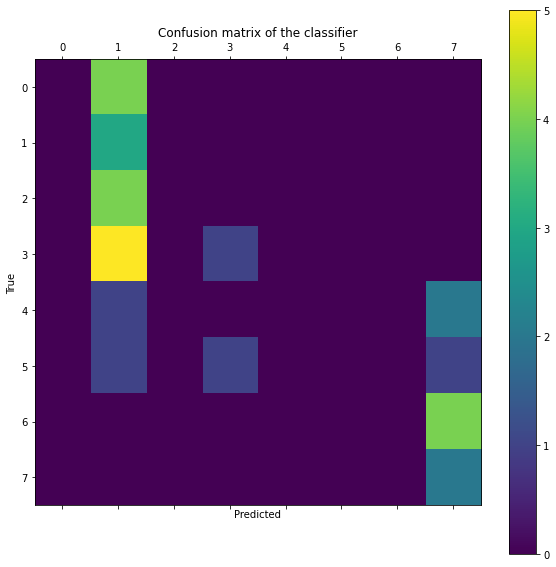

In [398]:
from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3', '4', '5', '6', '7']
cm = confusion_matrix(y_test, y_predict)
# print(cm)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [399]:
import numpy as np

FP = confusion_matrix(y_test, y_predict).sum(axis=0) - np.diag(confusion_matrix(y_test, y_predict))  
FN = confusion_matrix(y_test, y_predict).sum(axis=1) - np.diag(confusion_matrix(y_test, y_predict)) 
TP = np.diag(confusion_matrix(y_test, y_predict)) 
TN = confusion_matrix(y_test, y_predict).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

C:\Users\nethm\AppData\Local\Temp\ipykernel_11280\2163862877.py:13: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
C:\Users\nethm\AppData\Local\Temp\ipykernel_11280\2163862877.py:21: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [400]:
TPR 

array([0.        , 1.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 1.        ])

In [401]:
FPR

array([0.        , 0.57692308, 0.        , 0.04347826, 0.        ,
       0.        , 0.        , 0.25925926])

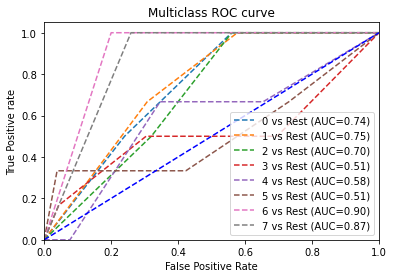

In [402]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_


# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB(alpha = 0.1)
# classifier.fit(x_train, y_train)

# y_pred = classifier.predict(x_test)
pred_prob = classifier.predict_proba(X_test)


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [403]:
data = dataset.loc[:,['1','2','3','4','6','17','18','19','20','21','22','23','24','25','26','27','28','29','30']]
data

,1,2,3,4,6,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2,2,3,3,2,3,2,2,1,1,1,1,1,3,2,1,2,1,1
1,2,2,3,3,2,2,2,2,1,1,1,1,1,3,2,3,2,2,3
2,2,2,2,3,2,2,1,2,1,1,1,1,1,2,2,1,1,2,2
3,1,1,1,3,2,3,1,2,1,1,1,1,2,3,2,2,1,3,2
4,2,2,1,3,2,2,1,1,1,1,1,2,1,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,3,3,2,1,1,1,1,1,2,1,2,1,3,3
141,1,1,2,4,2,3,2,2,2,1,2,1,1,3,2,2,1,5,3
142,1,1,1,4,2,2,2,2,1,1,1,1,1,3,3,2,1,4,3
143,2,1,2,4,1,2,2,1,1,1,1,2,1,2,1,2,1,5,3


In [404]:
X1 = data.iloc[:, 0:17].values
y1 = data.iloc[:, 18].values

In [405]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.20)

In [406]:
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [407]:
classifier = DecisionTreeClassifier()
classifier.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [408]:
y1_predict = classifier.predict(X1_test)

In [409]:
print(confusion_matrix(y1_test,y1_predict))
print(classification_report(y1_test, y1_predict))

[[0 1 2 0]
 [0 1 4 1]
 [1 3 6 4]
 [1 1 1 3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.17      0.17      0.17         6
           3       0.46      0.43      0.44        14
           4       0.38      0.50      0.43         6

    accuracy                           0.34        29
   macro avg       0.25      0.27      0.26        29
weighted avg       0.33      0.34      0.34        29



C:\Users\nethm\AppData\Local\Temp\ipykernel_11280\4134086653.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\nethm\AppData\Local\Temp\ipykernel_11280\4134086653.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


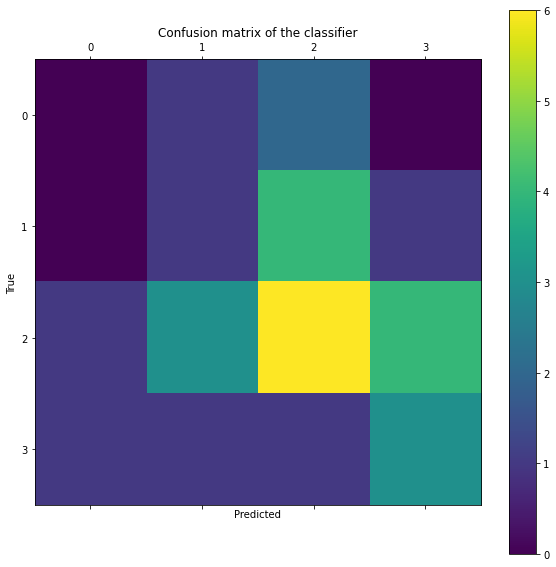

In [410]:
from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3']
cm = confusion_matrix(y1_test, y1_predict)
# print(cm)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()